In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [111]:
df= pd.read_csv('data.csv')

In [112]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [114]:
cols_to_convert = df.columns[df.dtypes == 'object'].drop('timestamp')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df[cols_to_convert].isna().sum()

,0
equipment_energy_consumption,912
lighting_energy,864
zone1_temperature,949
zone1_humidity,888
zone2_temperature,923


In [115]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [116]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15880.000000,15928.000000,15845.000000,15903.000000,15871.000000,15926.000000,15991.000000,15912.000000,15978.000000,16014.000000,...,16018.000000,15903.000000,15987.000000,15948.000000,15995.000000,15967.000000,15980.000000,15966.000000,15965.000000,15966.000000
mean,95.787256,3.935337,21.248633,39.046351,19.792984,39.488571,21.666530,38.197731,20.240384,37.942745,...,18.850306,40.315025,6.219168,755.760290,78.959506,4.196572,38.445121,2.780896,24.884603,25.114924
std,182.525447,14.599022,2.163772,9.967177,2.935683,10.143412,2.595276,10.157313,2.778673,10.788318,...,2.532307,11.189337,7.563162,13.664262,28.586422,4.415527,21.259284,6.084598,26.177152,25.507229
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.500000,37.025833,18.600000,37.745000,20.533333,36.590000,19.266875,35.193333,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.202974,12.212968
50%,60.000000,0.000000,21.323333,39.230000,19.600000,40.295833,21.767500,38.400000,20.290000,38.090000,...,18.890000,40.363333,6.000000,756.216667,84.166667,4.000000,40.000000,2.750000,24.874799,24.838493
75%,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,41.566667,...,20.200000,43.790000,9.250000,762.100000,91.976190,6.000000,40.000000,5.300000,37.957598,37.977074
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [117]:
df_null = pd.DataFrame(df.isnull().sum(),columns=['no_null'])
null_percentage=pd.DataFrame(df.isnull().mean() * 100,columns=['null_percentage'])
concated= pd.concat([df_null,null_percentage],axis=1)
concated

,no_null,null_percentage
timestamp,0,0.000000
equipment_energy_consumption,909,5.414259
lighting_energy,861,5.128358
zone1_temperature,944,5.622729
zone1_humidity,886,5.277265
zone2_temperature,918,5.467866
zone2_humidity,863,5.140270
zone3_temperature,798,4.753112
zone3_humidity,877,5.223658
zone4_temperature,811,4.830544


In [118]:
neg_cols = df.select_dtypes(include=['float64', 'int64']).columns
neg_cols_with_negatives = df[neg_cols].columns[(df[neg_cols] < 0).any()].tolist()
print(neg_cols_with_negatives)
print(len(neg_cols_with_negatives))


can_neg_val =['zone6_temperature','visibility_index','wind_speed', 'visibility_index', 'random_variable1', 'random_variable2','dew_point','outdoor_temperature']
for col in neg_cols_with_negatives:
  if col not in can_neg_val:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)


['equipment_energy_consumption', 'lighting_energy', 'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity', 'outdoor_temperature', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point', 'random_variable1', 'random_variable2']
19


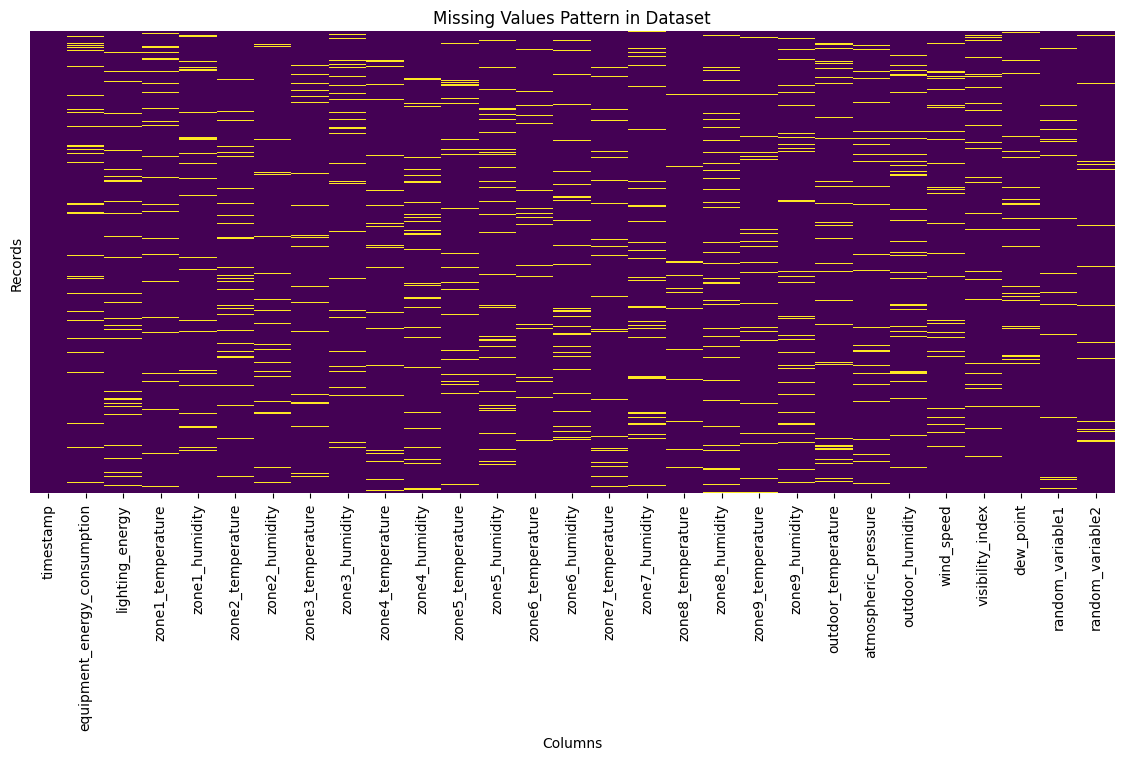

In [119]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Pattern in Dataset')
plt.xlabel('Columns')
plt.ylabel('Records')
plt.show()

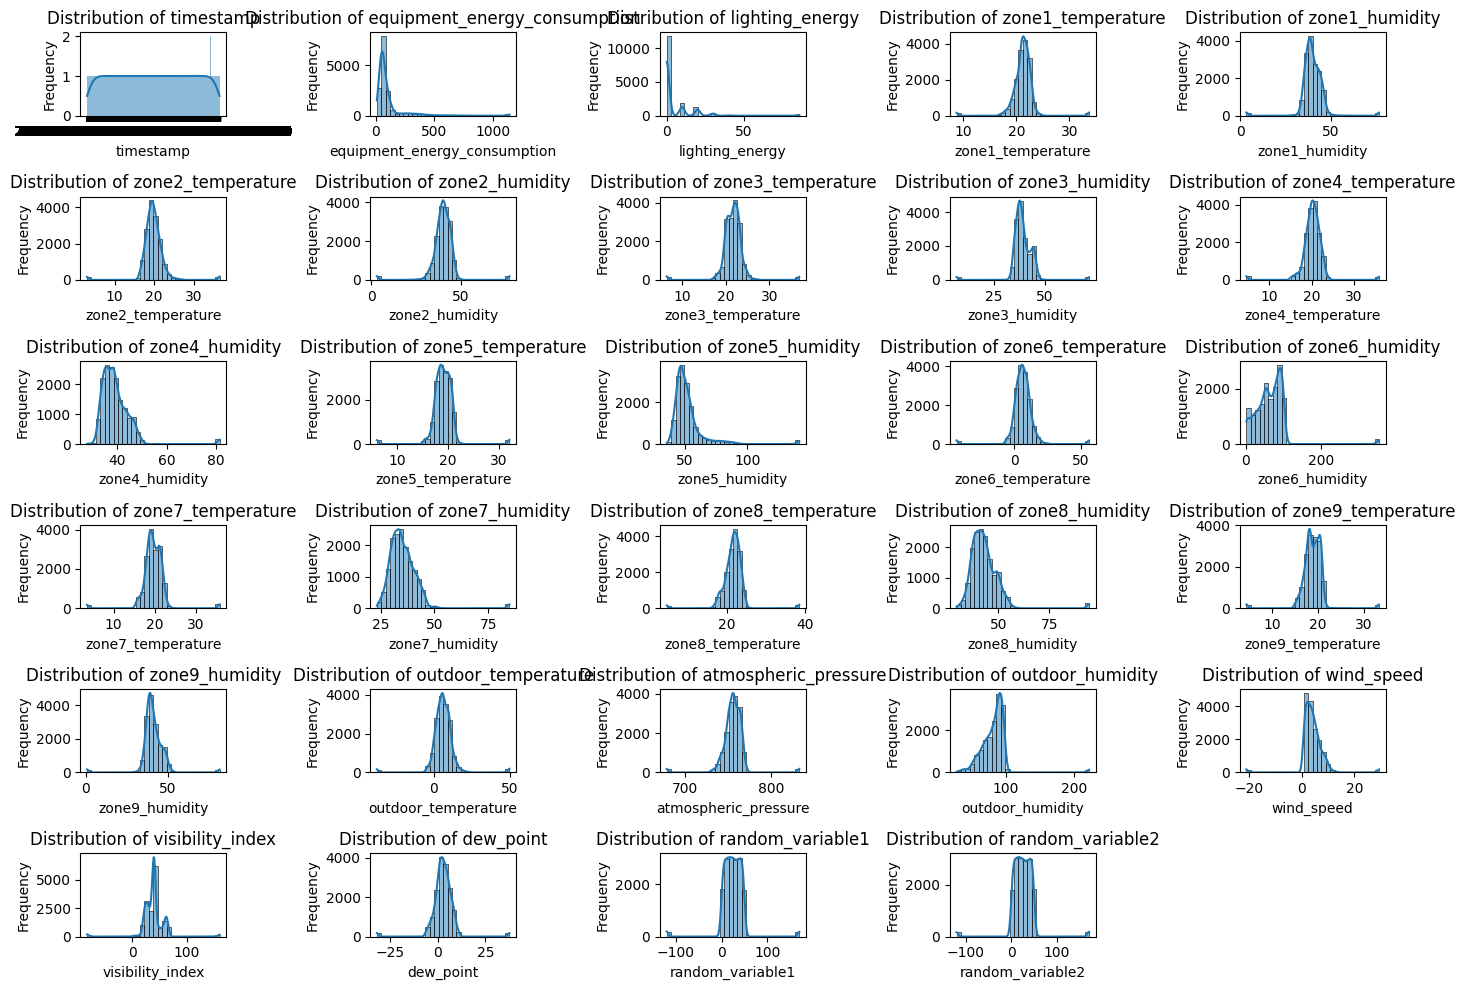

In [120]:
cols_to_plot = df.columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(6,5, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [121]:
null_columns = df.columns[df.isnull().any()]
skew_values=df[null_columns].skew(numeric_only=True)
symmetric_columns=skew_values[skew_values.between(-0.5, 0.5)].index.tolist()
skewed_columns=[col for col in null_columns if col not in symmetric_columns]


In [126]:
skew_values

,0
equipment_energy_consumption,4.570349
lighting_energy,4.158622
zone1_temperature,0.041939
zone1_humidity,-0.002812
zone2_temperature,0.325533
zone2_humidity,-0.125021
zone3_temperature,-0.210139
zone3_humidity,-0.006477
zone4_temperature,-0.347361
zone4_humidity,3.651982


In [122]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

df[symmetric_columns] = mean_imputer.fit_transform(df[symmetric_columns])
df[skewed_columns] = median_imputer.fit_transform(df[skewed_columns])

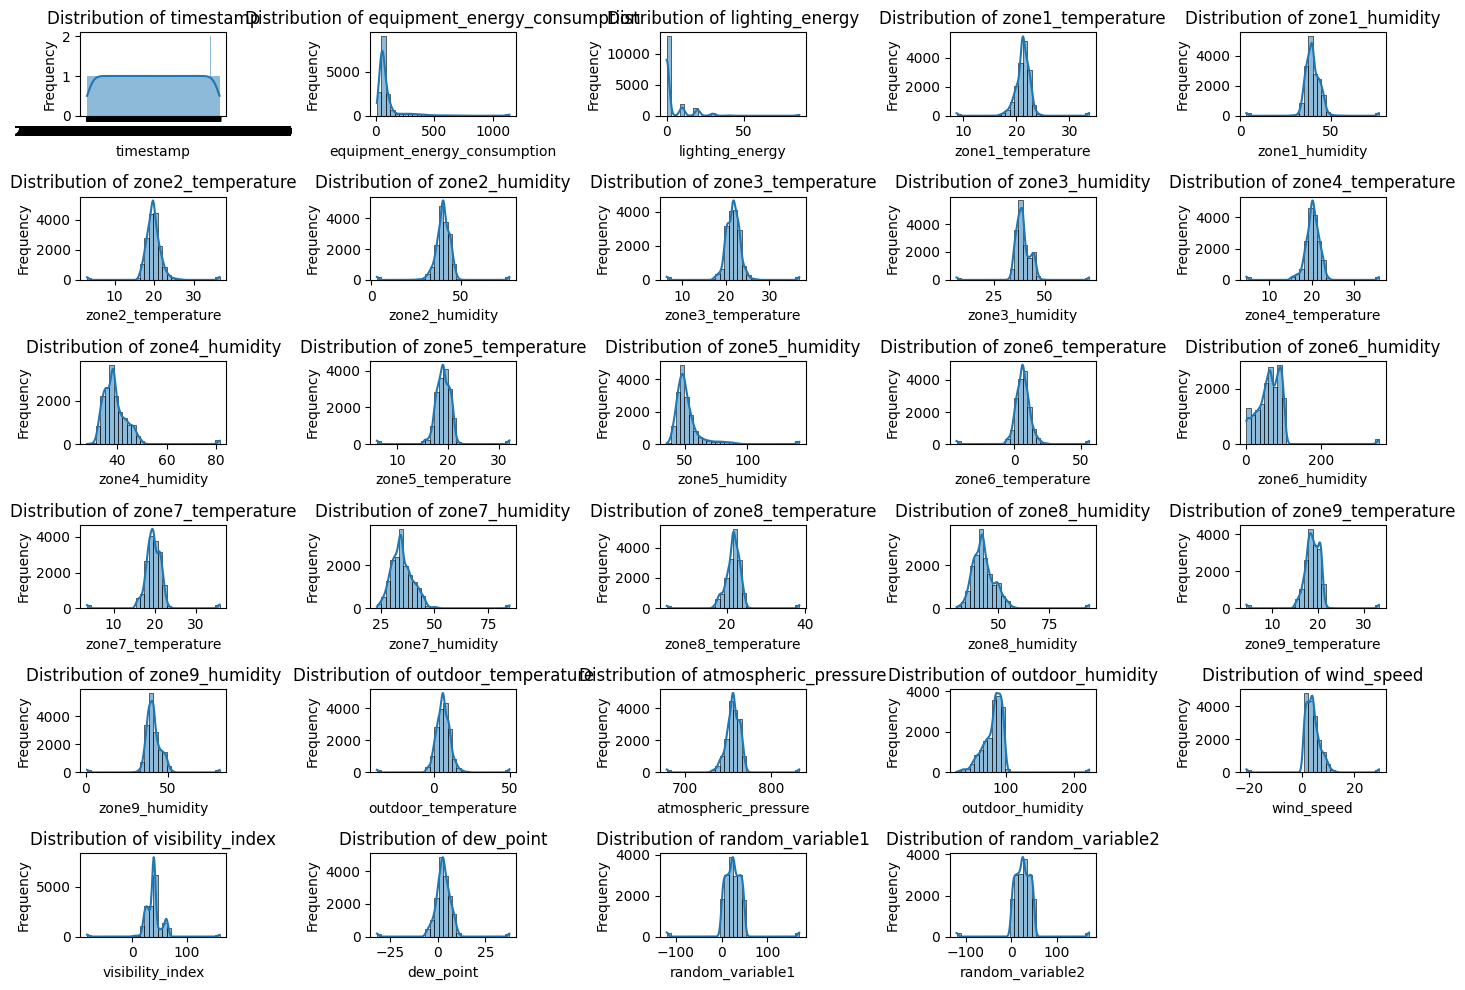

In [123]:
cols_to_plot = df.columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(6,5, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [124]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df.drop('timestamp', axis=1, inplace=True)

In [125]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday
0,60.0,0.0,33.746609,47.596667,19.2,44.790000,19.79,39.128477,19.000000,45.566667,...,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,11,1,0
1,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,11,1,0
2,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,11,1,0
3,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.240384,45.723333,...,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,11,1,0
4,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,1,0
